Training the XGBoost linear model using the linear data created earlier. 

Model is trained with XGBoost installed in the jupyter notebook!

In [273]:
# Install XGBoost in the notebook instance
!conda install -y -c conda-forge xgboost

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.12
  latest version: 4.6.14

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



In [274]:
%matplotlib inline
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb

In [275]:
linear_df = pd.read_csv('all_linear_data.csv')

In [276]:
linear_df.head(5)

,x,y,y_noise
0,4.439863,30.199317,27.659911
1,17.414646,95.073231,102.635654
2,4.134383,28.671916,24.974757
3,18.372218,99.861091,102.041951
4,9.768224,56.841119,56.978985


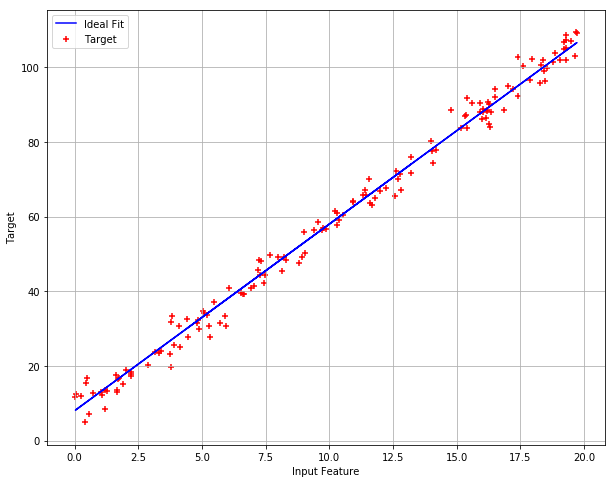

In [277]:
# Plot defining the linearity between x and y 
# Plot defining the linearity between x and y_noise
fig, ax = plt.subplots(figsize=(10, 8))
plt.plot(linear_df.x, linear_df.y, color='blue', label = 'Ideal Fit')
plt.scatter(x=linear_df.x, y=linear_df.y_noise, label = 'Target', color = 'r', marker = '+')
plt.grid(True)
plt.xlabel('Input Feature')
plt.ylabel('Target')
plt.legend()

In [278]:
training_file = 'linear_training_data.csv'
test_file = 'linear_test_data.csv'

In [279]:
# Read training and test data
# Specify the column names as the files dont contain column names
# Supply the column in a parameter called names as an array.
training_df = pd.read_csv(training_file)
test_df = pd.read_csv(test_file)

In [280]:
training_df.head(5)

,y_noise,x
0,88.563247,16.871099
1,13.212976,1.268020
2,60.304166,10.534351
3,92.380046,17.409662
4,102.040835,19.072610


In [281]:
test_df.head(5)

,y_noise,x
0,88.563247,16.871099
1,13.212976,1.268020
2,60.304166,10.534351
3,92.380046,17.409662
4,102.040835,19.072610


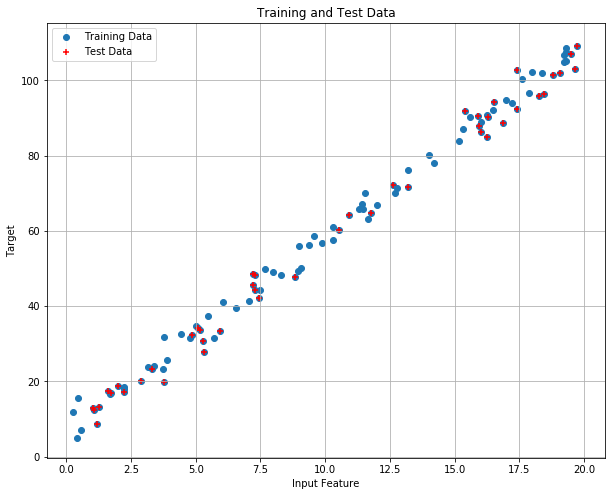

In [282]:
# Plot of the linearity for training data
# PLot of the linearity for test data

fig, ax = plt.subplots(figsize=(10, 8))
plt.scatter(training_df.x, training_df.y_noise, label = 'Training Data')
plt.scatter(x=test_df.x, y=test_df.y_noise, color = 'r', marker = '+', label = 'Test Data')
plt.grid(True)
plt.xlabel('Input Feature')
plt.ylabel('Target')
plt.title('Training and Test Data')
plt.legend()

In [283]:
# Separate input features i.e independent variables 
# and separate the dependent variables  y to be be trained by the XGBoost model.
# we use .ravel() to return a flattend out 1D array of the dependent variable(target variable)

# Training set is split into individual columns
X_train = training_df.iloc[:,1:] # This is Independent variable or input features
y_train = training_df.iloc[:,0].ravel()

# Test set is separated into individual columns
X_validation = test_df.iloc[:,1:]
y_validation = test_df.iloc[:,0].ravel()

In [284]:
y_train

array([ 88.56324658,  13.21297597,  60.30416627,  92.3800465 ,
       102.04083518,  72.21611053, 102.63565352,  12.93622437,
        20.15193829,  18.83217923,  48.43648516,  30.57751501,
        12.29237651,  45.5724023 ,  23.33872862,  34.26976597,
       107.02984906,   8.58586711,  27.83455737,  47.68714469,
        19.70668035,  44.30791987,  90.29004828,  48.21428846,
        42.16447264,  94.19571687,  90.37753286,  86.21609287,
        95.90745708,  84.84366617, 109.19389872,  16.76219676,
       101.41480805,  17.44710109,  91.78522116,  64.21119827,
        96.37210704,  32.31469885,  33.6282623 ,  71.66120981,
        64.85598978,  87.91830646,  33.34221963, 102.9517759 ,
        17.20631148,  31.56139298,  90.74201718,  44.34660663,
       108.52120571,  66.88769107,  67.18618765,  70.16190047,
        87.03918273,  37.22925716, 106.80522015,   4.92748162,
       105.12315662,  17.92670792,  65.84517701,  76.02148915,
        70.00485239,  40.95002764,  50.1531641 ,   7.07

In [285]:
# Initiate the XGBoost Regressor (XGBRegressor) with all default values
# It will be used to train and fit the model
regressor = xgb.XGBRegressor()

In [286]:
regressor

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [287]:
# We now fit the regressor to training data 
# and evaluate the error percentage for the training and test sets
# the error percentage must ideal trend downwards with each iteration.
# In this case the error percentage starts with 59% and reduces to 1.5% as the regressors learns
# rmse - Root Mean Square Error
regressor.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_validation, y_validation)])

[0]	validation_0-rmse:59.9154	validation_1-rmse:59.9312
[1]	validation_0-rmse:54.199	validation_1-rmse:54.1003
[2]	validation_0-rmse:49.0326	validation_1-rmse:48.895
[3]	validation_0-rmse:44.3694	validation_1-rmse:44.1344
[4]	validation_0-rmse:40.1549	validation_1-rmse:39.8796
[5]	validation_0-rmse:36.3543	validation_1-rmse:35.9839
[6]	validation_0-rmse:32.9178	validation_1-rmse:32.5347
[7]	validation_0-rmse:29.811	validation_1-rmse:29.4513
[8]	validation_0-rmse:27.0065	validation_1-rmse:26.6482
[9]	validation_0-rmse:24.4668	validation_1-rmse:24.1195
[10]	validation_0-rmse:22.1778	validation_1-rmse:21.8218
[11]	validation_0-rmse:20.0954	validation_1-rmse:19.7169
[12]	validation_0-rmse:18.2253	validation_1-rmse:17.8472
[13]	validation_0-rmse:16.5299	validation_1-rmse:16.1302
[14]	validation_0-rmse:15.0003	validation_1-rmse:14.589
[15]	validation_0-rmse:13.6189	validation_1-rmse:13.1926
[16]	validation_0-rmse:12.3733	validation_1-rmse:11.9326
[17]	validation_0-rmse:11.25	validation_1-rms

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [288]:
# Evaluation results can obtained using evals_results function

eval_results = regressor.evals_result()

In [289]:
eval_results

{'validation_0': {'rmse': [59.915394,
   54.198971,
   49.032562,
   44.369446,
   40.154884,
   36.354263,
   32.917759,
   29.811039,
   27.00647,
   24.466793,
   22.177771,
   20.09539,
   18.225262,
   16.529873,
   15.000332,
   13.6189,
   12.373325,
   11.249956,
   10.233866,
   9.318342,
   8.493931,
   7.750203,
   7.08306,
   6.482958,
   5.944533,
   5.461229,
   5.029148,
   4.644796,
   4.300961,
   3.996599,
   3.726644,
   3.489061,
   3.280589,
   3.095958,
   2.932367,
   2.792295,
   2.668563,
   2.564667,
   2.471993,
   2.391735,
   2.324584,
   2.265652,
   2.211031,
   2.16715,
   2.124197,
   2.089766,
   2.056503,
   2.028913,
   2.004578,
   1.981877,
   1.958192,
   1.943447,
   1.92439,
   1.905876,
   1.893058,
   1.874805,
   1.861881,
   1.849355,
   1.833931,
   1.82793,
   1.808806,
   1.80372,
   1.799252,
   1.795322,
   1.779727,
   1.771783,
   1.762211,
   1.753605,
   1.745494,
   1.73795,
   1.735292,
   1.73009,
   1.727898,
   1.712081,
   1.7

In [290]:
# Lets plot the error rate for both training and test data sets 
# for this we need to get the x which in this case will be the number/range of training rounds 

training_rounds = range(len(eval_results['validation_0']['rmse']))

In [291]:
training_rounds

range(0, 100)

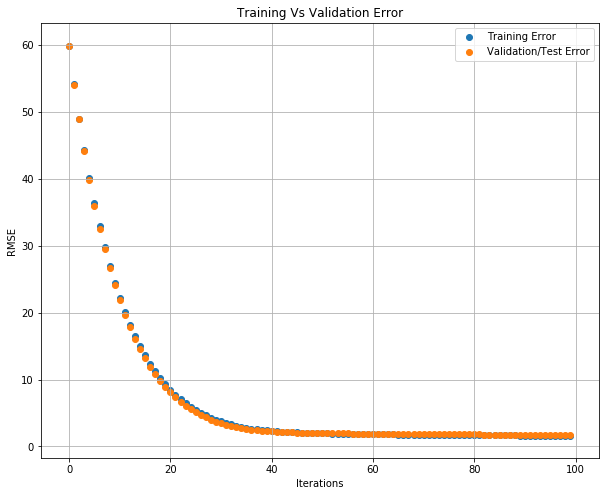

In [305]:
# Lets plot the error rate, which should trend downwards
fig, ax = plt.subplots(figsize=(10, 8))
plt.scatter(x=training_rounds, y=eval_results['validation_0']['rmse'], label = 'Training Error')
plt.scatter(x=training_rounds, y=eval_results['validation_1']['rmse'], label = 'Validation/Test Error')
plt.grid(True)
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title('Training Vs Validation Error')
plt.legend()

# IF TRAINING ERROR GOES DOWN BUT VALIDATION ERROR GOES UP THEN IT INDICATES OVERFITTING

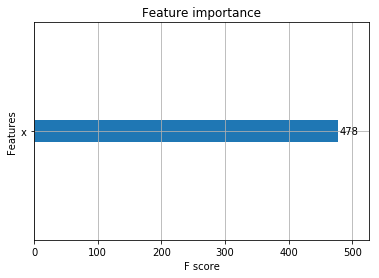

In [307]:
# xgb.plot_importance indicates which independent variables are contibuting to imporve the model.
xgb.plot_importance(regressor)

In [294]:
# Now lets create the predicted values for x using the predict method
# For that we need to extract the column with all the x values and use to generate the prediction
linear_df.head(5)

,x,y,y_noise
0,4.439863,30.199317,27.659911
1,17.414646,95.073231,102.635654
2,4.134383,28.671916,24.974757
3,18.372218,99.861091,102.041951
4,9.768224,56.841119,56.978985


In [295]:
x_test = linear_df.iloc[:, :1]

In [296]:
x_test.head(5)

,x
0,4.439863
1,17.414646
2,4.134383
3,18.372218
4,9.768224


In [297]:
type(linear_df.iloc[:5, 0])

pandas.core.series.Series

In [298]:
# Create another column in the dataframe to notedown the predicted results.
# Use regressor.predict() method to get the y_predict values

results_test = regressor.predict(x_test)

In [302]:
results_test

array([ 32.158833 ,  99.79756  ,  25.818325 ,  99.5197   ,  57.693382 ,
        66.875015 ,  87.0496   ,  59.385063 ,  33.8729   ,  23.715567 ,
        17.019054 ,  83.82669  ,  48.682606 ,  23.59826  ,  99.79756  ,
        34.01864  ,  48.682606 ,  33.8729   ,  71.07422  ,  66.66575  ,
        66.875015 ,  31.518047 ,  33.8729   ,  32.694294 ,  40.43363  ,
        20.232351 ,  23.59826  , 105.495445 , 105.495445 ,  28.013105 ,
        13.86349  ,  25.818325 ,  79.178    ,  89.50254  ,  13.86349  ,
        66.66575  ,  10.979865 ,  59.385063 ,  71.41589  , 108.23764  ,
        32.694294 ,  88.77001  ,  93.61382  ,  98.69926  ,  10.979865 ,
        55.91499  , 103.98293  ,  48.682606 ,  90.24879  ,  64.285965 ,
        89.50254  ,  57.693382 ,   9.340346 ,  17.019054 ,  18.097332 ,
        32.694294 , 105.495445 ,  71.07422  ,  90.24879  ,  65.8306   ,
        71.07422  ,  88.77001  ,  98.69926  ,  99.28183  ,  91.784256 ,
        18.097332 ,  45.768295 ,   9.340346 ,  64.285965 ,  88.5

In [303]:
linear_df['y_pred'] = results_test

In [304]:
linear_df.head(5)

,x,y,y_noise,y_pred
0,4.439863,30.199317,27.659911,32.158833
1,17.414646,95.073231,102.635654,99.797562
2,4.134383,28.671916,24.974757,25.818325
3,18.372218,99.861091,102.041951,99.519699
4,9.768224,56.841119,56.978985,57.693382


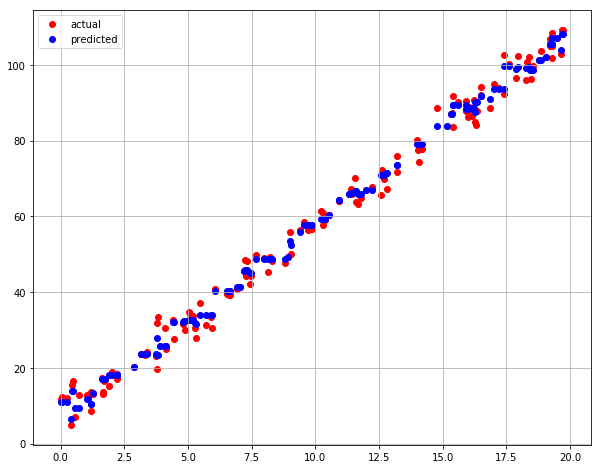

In [308]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.scatter(x=linear_df.x,y=linear_df.y_noise,color='r',label='actual')
plt.scatter(x=linear_df.x,y=linear_df.y_pred,color='b',label='predicted')
plt.grid(True)
plt.legend()

In [310]:
# write the csv file out to include the predicted values. 
linear_df.to_csv('all_linear_with_pred_values.csv')

In [312]:
# Create a useable model.
# this model can now be invoked from any application to carry out the predictions. 
regressor.save_model('linear_xgboost_model')